## Part two , max et min 

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import time 
import math 
import random

### max et min A : 
Nombre de test est de 2(N-1) , O(N)

In [24]:
def maxmin(tableau):
    
    cpt = 0
    max = tableau[0]
    min = tableau[0]
    end = len(tableau)
    
    for i in range(1,end):
        cpt+=2                      # deux test dans chque iteration 
        if max < tableau[i]:
            max=tableau[i]
        if min > tableau[i]:
            min = tableau[i]
            
            
    return {'min' : min , 'max' : max , 'compteur' : cpt}

In [13]:
tab = np.random.randint(100,200,size=10)
print(tab)
print(maxmin(tab))

[184 108 111 137 182 166 106 158 197 186]
{'min': 106, 'max': 197, 'compteur': 18}


### max et min 2
- parcours deux a deux , plus petit dans l'indice impair et plus grand dans le pair 
- parcourir les indice pair et impair pour le max et min 
- tester la dernier case si necessaire 

**==> 2 parcours N/2** 

In [25]:
def maxmin_2(tableau):
    
    cpt=0
    end= len(tableau)-1
    
    # boucle de permutation deux a deux 
    
    for i in range(0,end,2):
        cpt+=1
        if tableau[i]<tableau[i+1]:
            tableau[i] , tableau[i+1] = tableau[i+1] , tableau[i]                        
           
    
    
    min = tableau[1]
    max = tableau[0]
        
    for i in range(2,end,2):
        cpt+=2
        if tableau[i] > max:                # parcourir les indices pair a la rechereche du max
            max = tableau[i]
        if tableau[i+1] < min :
            min = tableau[i+1]              # les indices impairs possede le min 
            
            
            
    # treaiter le cas ou taille tableau est impair et comaprer avec la derniere case 
    cpt+=1
    if (len(tableau)%2==1):
        cpt+=2
        if(min > tableau[-1]):
            min = tableau[-1]
        if(max < tableau[-1]):
            max = tableau[-1]  
    
    
    return {'min' : min , 'max' : max , 'compteur' : cpt }

#### exemple de fonctionement sur petite taille 

In [26]:
pair_array = np.random.randint(100,200,size=14)
impair_array = np.random.randint(100,200,size=15)

print(pair_array)
print("Resultat algorithme A : ")
print(maxmin(pair_array))
print("\n")

print(pair_array)
print("Resultat algorithme A sur algorithme pair : ")
print(maxmin_2(pair_array))
print("\n")


# mettre le max dans la dernier case pour tester si algo B test bien la derniere case quand taille est impair 
impair_array[-1]=500
print(impair_array)
print("Resultat algorithme B sur algorithme impair : ")
print(maxmin_2(impair_array))





[100 189 164 101 162 138 111 104 167 157 188 119 190 133]
Resultat algorithme A : 
{'min': 100, 'max': 190, 'compteur': 26}


[100 189 164 101 162 138 111 104 167 157 188 119 190 133]
Resultat algorithme A sur algorithme pair : 
{'min': 100, 'max': 190, 'compteur': 20}


[173 112 163 117 130 113 122 119 100 181 188 105 112 105 500]
Resultat algorithme B sur algorithme impair : 
{'min': 100, 'max': 500, 'compteur': 22}


### etude exprimental 

In [27]:
tailletableau=[100000,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000]



temps_exec1=[]
nbr_comparaison1=[]

temps_exec2=[]
nbr_comparaison2=[]

for N in tailletableau:
 
    tab=np.random.randint(100,1000000000,size=N)    
    
    debut = time.time()
    result=maxmin_2(tab)
    fin = time.time()

    temps_exec2.append(fin-debut)
    nbr_comparaison2.append(result['compteur'])
    
    debut = time.time()
    result=maxmin(tab)
    fin = time.time()

    temps_exec1.append(fin-debut)
    nbr_comparaison1.append(result['compteur'])
    
    

    
compare = pd.DataFrame(zip( temps_exec1 , nbr_comparaison1, temps_exec2 , nbr_comparaison2 ),index=tailletableau , columns=["temps (s) maxmin_A","nbr_iter_A","temps (s) maxmin_B","nbr_iter_B",])
compare.to_csv("maxmin.csv")
print(compare)

    
    

         temps (s) maxmin_A  nbr_iter_A  temps (s) maxmin_B  nbr_iter_B
100000             0.034362      199998            0.047782      149999
200000             0.064503      399998            0.065119      299999
400000             0.114083      799998            0.161411      599999
600000             0.194596     1199998            0.230275      899999
800000             0.332164     1599998            0.313253     1199999
1000000            0.319145     1999998            0.441170     1499999
1200000            0.369181     2399998            0.484028     1799999
1400000            0.427433     2799998            0.555154     2099999
1600000            0.483510     3199998            0.632499     2399999
1800000            0.553164     3599998            0.712637     2699999


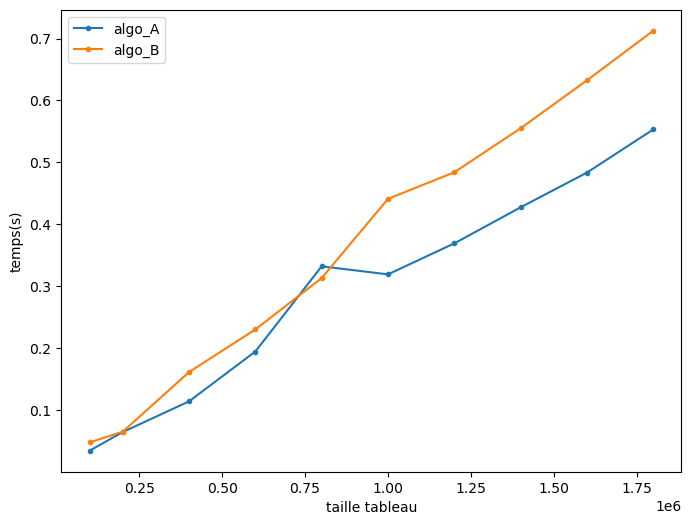

In [28]:
plt.figure(figsize=(8,6))

plt.plot(tailletableau , temps_exec1 , '.-' , label="algo_A")
plt.plot(tailletableau , temps_exec2 , '.-' , label="algo_B")
plt.xlabel("taille tableau")
plt.ylabel("temps(s)")
plt.legend()
plt.savefig("comparison_maxmin.png")
plt.show()


